In [7]:
import numpy as np
import matplotlib.pyplot as plt

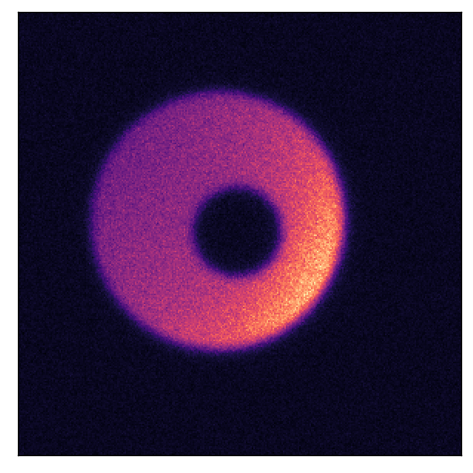

In [8]:
b2=np.load('../data/Test_data0.npz')
c2=b2['image']
#c2=c2[2000:2001, 1850:2150]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(c2, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()

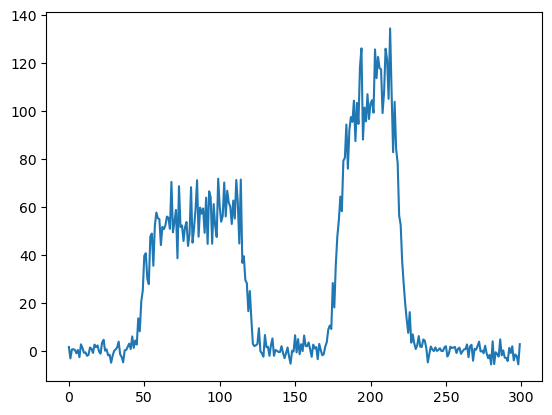

In [6]:
b2=np.load('../data/Test_data0.npz')
c2=b2['image']
plt.plot(c2[150:151].flatten())

In [11]:
b2['Translation']

array([-0.00096694,  0.00062654, -0.00071745])

In [57]:
x={}
for i in range(2):
    a=i
    x[a]=i**2
    np.save('testing_'+str(i), x[a])

In [40]:
x[2]

4

In [7]:
t0=np.load('trans_0.npy')
t1=np.load('trans_1.npy')
t2=np.load('trans_2.npy')

In [8]:
t0

array([-9.18052952e-04, -9.66944729e-04,  6.26540478e-05])

In [9]:
t1

array([-9.18052952e-04, -9.66944729e-04,  6.26540478e-05])

In [10]:
rot1=np.load('rot_1.npy')
img = image1[2125:2175, 2475:2525]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(img, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()

NameError: name 'image1' is not defined

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 

import batoid
import galsim
import wfsim

auxtel0 = batoid.Optic.fromYaml("AuxTel.yaml")
bandpass = galsim.Bandpass("LSST_r.dat", wave_type='nm')

obs_params = {
    "zenith": 30 * galsim.degrees,
    "raw_seeing": 0.7 * galsim.arcsec,
    "temperature": 293, 
    "pressure": 69, 
    "H2O_pressure": 1, 
    "wavelength": bandpass.effective_wavelength,
    "exptime": 30, 
}
atm_params = {
    "screen_size": 819.2,
    "screen_scale": 0.1,
    "nproc": 6,
}

def create_simulator(telescope: batoid.Optic) -> wfsim.SimpleSimulator:
   
    rng = np.random.default_rng(42)

    simulator = wfsim.SimpleSimulator(
        obs_params,
        atm_params,
        telescope,
        bandpass,
        shape=(4000, 4000),
        rng=rng,
    )

    return simulator


Trans_data={}
Rot_data={}
image={}
for i in range(4):
    a=i
    rng = np.random.default_rng(0)
    thx = np.deg2rad(0)
    thy = np.deg2rad(0)
    star_temp = rng.uniform(4_000, 10_000) 
    sed = wfsim.BBSED(star_temp) 
    flux = rng.integers(1_000_000, 2_000_000)


    Trans_data[a] = np.array([
    rng.uniform(-0.001, 0.001),  # meters
    rng.uniform(-0.001, 0.001),
    rng.uniform(-0.0001, 0.0001),
])
    Rot_data[a] = (
    batoid.RotX(np.deg2rad(rng.uniform(-0.1, 0.1)/60)) @
    batoid.RotY(np.deg2rad(rng.uniform(-0.1, 0.1)/60))
)
    intra_perturbed = (
    auxtel0
    .withGloballyShiftedOptic("M2", Trans_data[a])
    .withLocallyRotatedOptic("M2", Rot_data[a])
)

In [22]:
star_temp

7821.770123928725

In [18]:
Trans_data[1]

array([-9.18052952e-04, -9.66944729e-04,  6.26540478e-05])

In [2]:
import numpy as np # standard package for doing calculations
import matplotlib.pyplot as plt # standard package for plotting

import batoid
import galsim
import wfsim

In [6]:
t0=np.load('rot_0.npy')
t1=np.load('rot_1.npy')

In [7]:
t0

array([[ 1.00000000e+00,  0.00000000e+00,  6.20381796e-06],
       [ 1.48973187e-10,  1.00000000e+00, -2.40131461e-05],
       [-6.20381796e-06,  2.40131461e-05,  1.00000000e+00]])

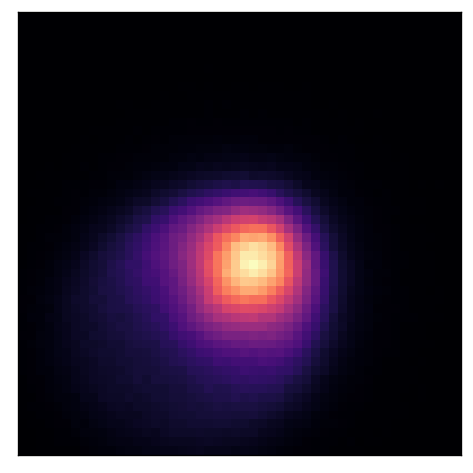

In [14]:
image0=np.load('image_0.npy')
img0 = image0[2125:2175, 2475:2525]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(img0, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()

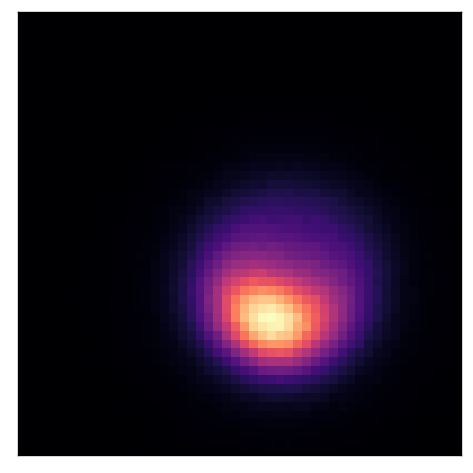

In [24]:
image1=np.load('image_1.npy')
img1 = image1[1225:1275, 1875:1925]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(img1, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()

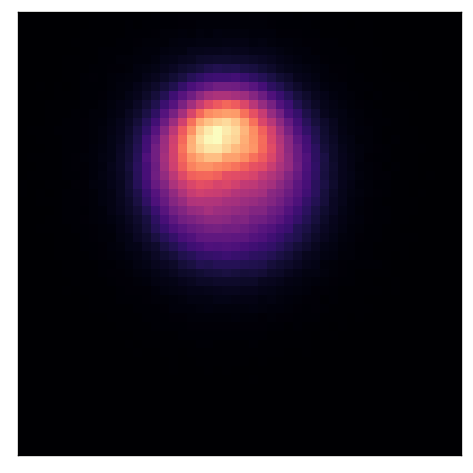

In [36]:
image2=np.load('image_2.npy')
img2 = image2[1750:1800, 1915:1965]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(img2, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()

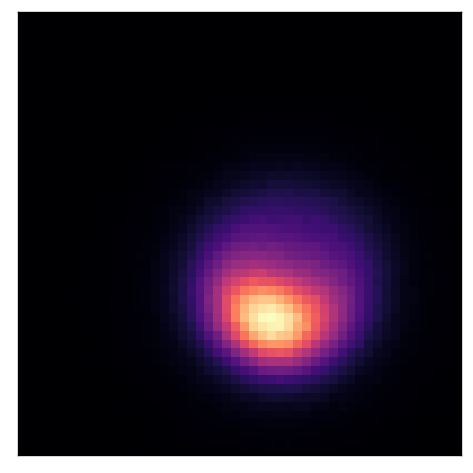

In [43]:
image3=np.load('image_3.npy')
img3 = image1[1225:1275, 1875:1925]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(img3, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()

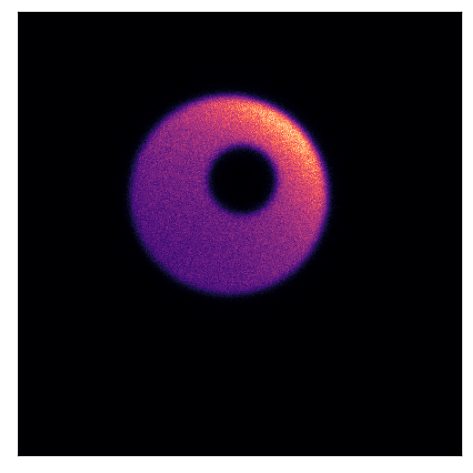

In [25]:
dimage0=np.load('donut_image_0.npy')
dimg0 = dimage0[1900:2300, 2300:2700]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(dimgage0, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()

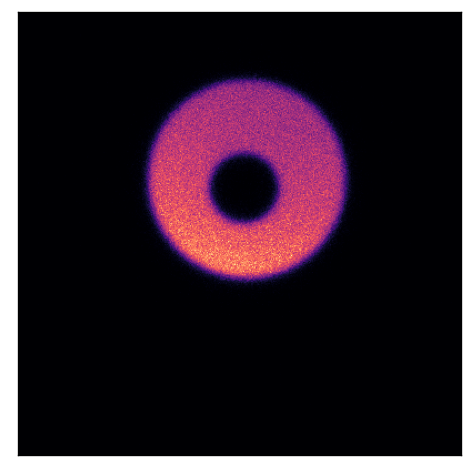

In [27]:
dimage1=np.load('donut_image_1.npy')
dimg1 = dimage1[1000:1400, 1700:2100]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(dimg1, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()

In [20]:
import numpy as np # standard package for doing calculations
import matplotlib.pyplot as plt # standard package for plotting
from scipy import ndimage

In [7]:
d1=np.load('../data/donut_data0.npz')

In [18]:
image=d1['image']

In [61]:
COM=ndimage.center_of_mass(image)
x_min=int(COM[0])-100
x_max=int(COM[0])+400
y_min=int(COM[1])-400
y_max=int(COM[1])+400

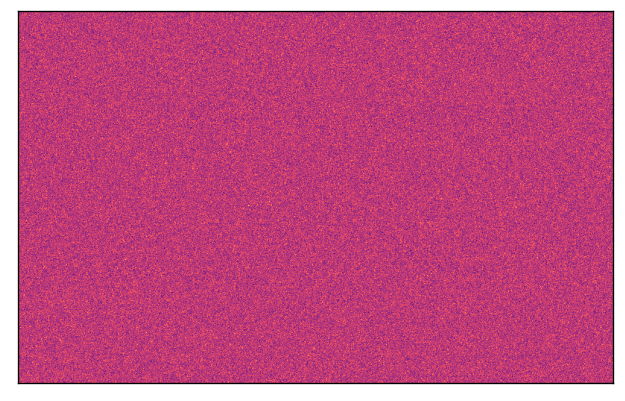

In [62]:
Crop_img = image[x_min:x_max, y_min:y_max]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(Crop_img, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()



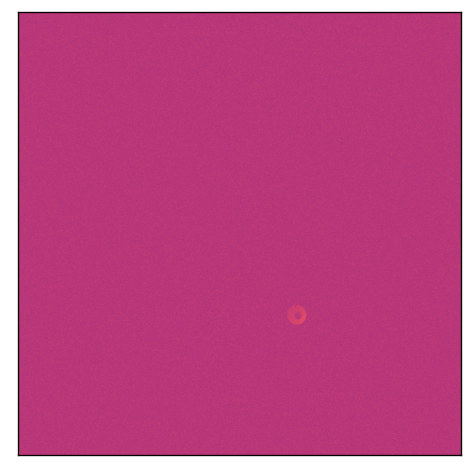

In [63]:
Crop_img = image[x_min:x_max, y_min:y_max]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(image, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()

In [64]:
COM

(190.9765518218404, 1746.7696774884387)

In [66]:
a1=np.load('../data/COM_data0.npz')

In [68]:
test_im=a1['image']

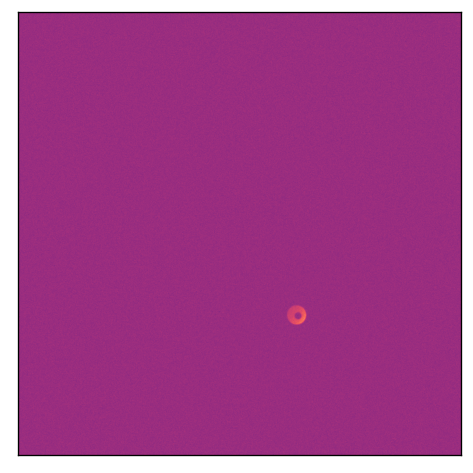

In [119]:
#Test_crop = [x_min:x_max, y_min:y_max]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(test_im, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()


In [108]:
COM1=ndimage.center_of_mass(test_im)
x1_min=int(COM1[0])+100
x1_max=int(COM1[0])+330
y1_min=int(COM1[1])-400
y1_max=int(COM1[1])+400

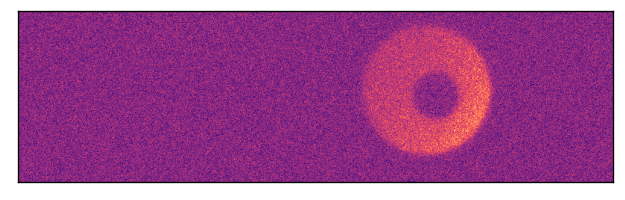

In [109]:
Test_crop = test_im[x1_min:x1_max, y1_min:y1_max]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(Test_crop, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()

In [116]:
b1=np.load('../data/Center_data0.npz')

In [117]:
c1=b1['image']

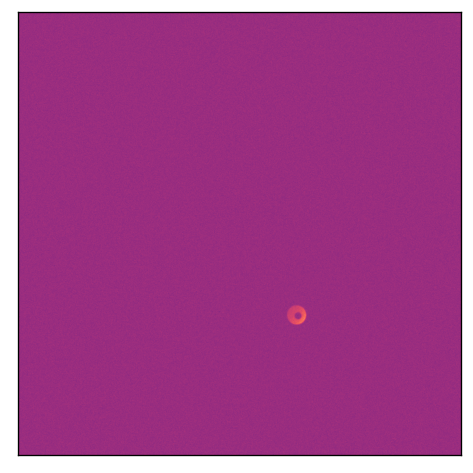

In [118]:
#Test_crop = test_im[x1_min:x1_max, y1_min:y1_max]
fig, ax  = plt.subplots(dpi=120)
ax.imshow(c1, origin="lower", cmap="magma")
ax.set(xticks=[], yticks=[])

plt.show()